# Import Libraries

In [69]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "darkgrid")
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer

# Import Automobile Dataset

https://archive.ics.uci.edu/ml/datasets/automobile

1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

Price prediction based on automobile features

In [70]:
df = pd.read_csv("C:/Users/imoge/Projects/Datasets/Automobile_data.csv")

In [71]:
df.shape

(205, 26)

In [72]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [73]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [74]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [76]:
# Convert question marks to nans and drop nan values
df = df.replace('?', np.nan)
df.dropna(inplace = True)
df.shape

(159, 26)

In [77]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [78]:
df.head(1)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950


In [79]:
# Convert some of the features classed as objects to numeric
df['normalized-losses'] = pd.to_numeric(df['normalized-losses'],errors='coerce')
df['bore'] = pd.to_numeric(df['bore'],errors='coerce')
df['stroke'] = pd.to_numeric(df['stroke'],errors='coerce')
df['horsepower'] = pd.to_numeric(df['horsepower'],errors='coerce')
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'],errors='coerce')
df['price'] = pd.to_numeric(df['price'],errors='coerce')

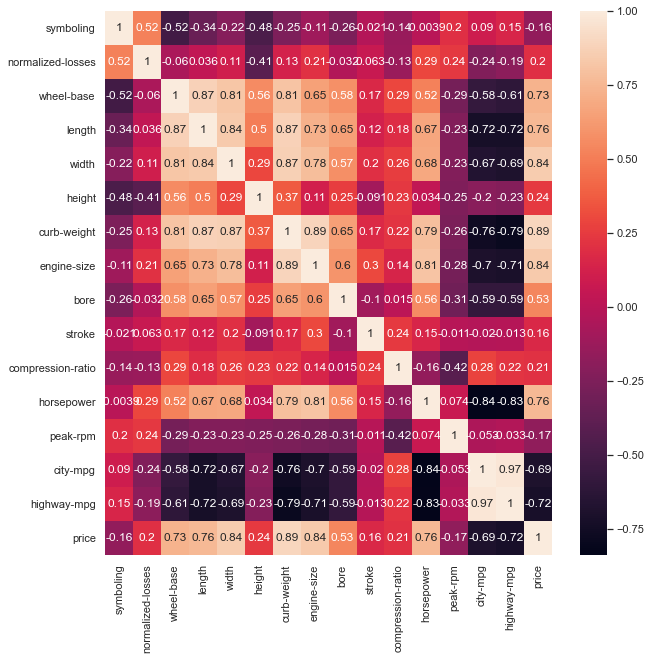

In [80]:
# View correlation with numeric variables with price
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(), annot = True);

Amongst the numeric variables, the price is most highly correlated with:
* wheel base, length, width, curb weight, engine size, horsepower (positive)
* city and highway mpg (negative)
* multicollinearity between some of these such as length and width which is basically size of the car and the curb-weight with the dimensions
* the engine size is positively correlated also with horsepower, curb weight and length and weight.
* likely need to choose just one or two of these variables in relation to price
* the horsepower, miles per gallon (highway) are chosen as they are more understandable than curb-weight as a variable even though the correlation with curb weight is higher.

Of the categorical variables:

* the number of doors, body style, drive wheels, engine location, engine type and cylinders, fuel system, bore and stroke are likely highly related to the make of car, so only the make, fuel type and bodystyle will be chosen.

# Visualisations

The chosen features are:

* horsepower
* miles per gallon (highway)
* the make of car
* the fuel type
* bodystyle of car

### Horsepower

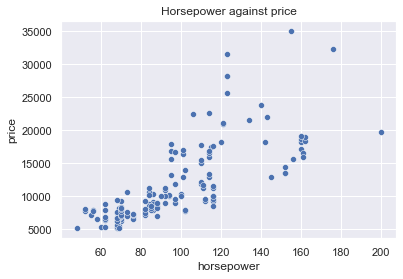

In [81]:
sns.scatterplot(data = df, x = "horsepower", y = "price")
plt.title("Horsepower against price");

Positively correlated

### Miles per gallon

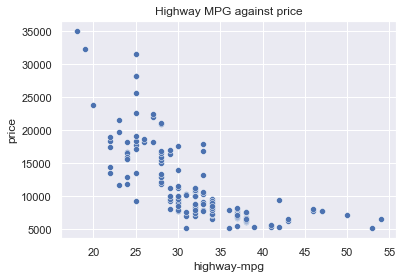

In [82]:
sns.scatterplot(data = df, x = "highway-mpg", y = "price")
plt.title("Highway MPG against price");

Negatively correlated

### Make of car

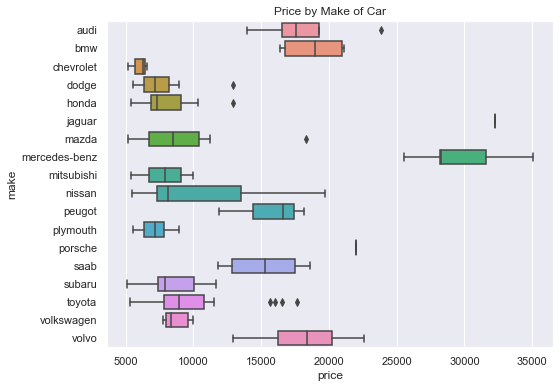

In [83]:
fig, ax = plt.subplots(figsize = (8,6))
sns.boxplot(data = df, y = "make", x= "price")
plt.title("Price by Make of Car");

* Mercedes highest priced and Chevrolet lowest prices.
* Prices for Nissans tend to vary more widely than other makes
* Some makes have outlier prices (in particular Mazda has one very high outlier)

### Fuel type

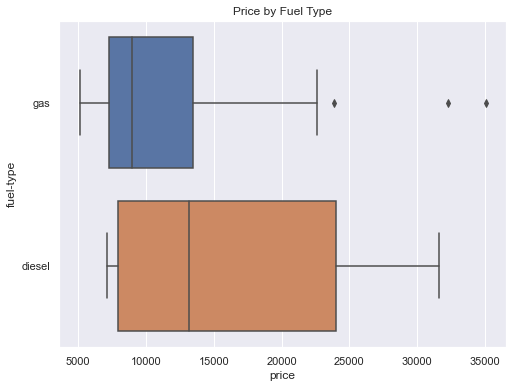

In [84]:
fig, ax = plt.subplots(figsize = (8,6))
sns.boxplot(data = df, y = "fuel-type", x= "price")
plt.title("Price by Fuel Type");

* Diesel prices vary more widely than gas
* The mean price for diesels is higher than gas
* There are some outliers for gas models

### Bodystyle of car

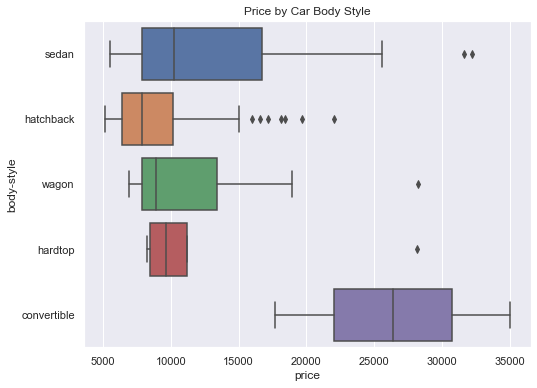

In [85]:
fig, ax = plt.subplots(figsize = (8,6))
sns.boxplot(data = df, y = "body-style", x= "price")
plt.title("Price by Car Body Style");

* Convertibles have the highest mean price and hatchbacks the lowest
* The pice of sedans and convertibles varies more than the other models
* Hatchbacks have a number of highly priced vehicles shown as outliers

# Feature Engineering

In [86]:
features = ["horsepower","highway-mpg", "make","fuel-type","body-style"]
X = df[features]
X.head()

,horsepower,highway-mpg,make,fuel-type,body-style
3,102,30,audi,gas,sedan
4,115,22,audi,gas,sedan
6,110,25,audi,gas,sedan
8,140,20,audi,gas,sedan
10,101,29,bmw,gas,sedan


In [87]:
y = df[["price"]].astype(float)

In [88]:
# Check the basic stats for the numeric variables - rescale data if means and standard deviations vary significantly
X.describe()

,horsepower,highway-mpg
count,159.000000,159.000000
mean,95.836478,32.081761
std,30.718583,6.459189
min,48.000000,18.000000
25%,69.000000,28.000000
50%,88.000000,32.000000
75%,114.000000,37.000000
max,200.000000,54.000000


In [89]:
X.head()

,horsepower,highway-mpg,make,fuel-type,body-style
3,102,30,audi,gas,sedan
4,115,22,audi,gas,sedan
6,110,25,audi,gas,sedan
8,140,20,audi,gas,sedan
10,101,29,bmw,gas,sedan


In [90]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 3 to 204
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   horsepower   159 non-null    int64 
 1   highway-mpg  159 non-null    int64 
 2   make         159 non-null    object
 3   fuel-type    159 non-null    object
 4   body-style   159 non-null    object
dtypes: int64(2), object(3)
memory usage: 11.5+ KB


## Convert categorical variables to one-hot encoding and scale numerical

In [91]:
num_features = X[["horsepower","highway-mpg"]].reset_index(drop = True)
cat_features = X[["make","fuel-type","body-style"]].reset_index(drop = True)

In [92]:
s = StandardScaler()
scaled = pd.DataFrame(s.fit_transform(num_features),columns = num_features.columns)
X_new = pd.concat([scaled,cat_features],axis = 1)
X = pd.get_dummies(X_new)
X.head()

,horsepower,highway-mpg,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_jaguar,make_mazda,make_mercedes-benz,...,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
0,0.201279,-0.323313,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.625812,-1.565772,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0.462530,-1.099850,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,1.442223,-1.876386,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.168622,-0.478620,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


# Train test splits and create tensors

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(127, 27) (32, 27) (127, 1) (32, 1)


In [45]:
# Create tensors
dtype = dtype = torch.float
X_train_tensor = torch.tensor(X_train.values, dtype = dtype)
X_test_tensor = torch.tensor(X_test.values, dtype = dtype)

y_train_tensor = torch.tensor(y_train.values, dtype = dtype)
y_test_tensor = torch.tensor(y_test.values, dtype = dtype)

In [46]:
print(X_train_tensor.shape, X_test_tensor.shape, y_train_tensor.shape, y_test_tensor.shape)

torch.Size([127, 27]) torch.Size([32, 27]) torch.Size([127, 1]) torch.Size([32, 1])


## Construct torch model and run

In [47]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(127, 27) (32, 27) (127, 1) (32, 1)


In [64]:
# Define the model parameters
inp = 27  # input size equal to number of features
out = 1  # output size which is expected to be one price

hid = 100  # number of hidden layers in the network

loss_fn = torch.nn.MSELoss() # mean-squared error loss

learning_rate = 0.001  # learning rate for the network

In [65]:
# Build the model
model = torch.nn.Sequential(torch.nn.Linear(inp, hid), # use Sequential and inputs and number of layers input to linear model
                            torch.nn.Sigmoid(),        # Sigmoid activation function
                            torch.nn.Linear(hid, out), # Final layer takes in ouput of hidden layer and outputs one 
)

In [66]:
# Return model structure
model

Sequential(
  (0): Linear(in_features=27, out_features=100, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=100, out_features=1, bias=True)
)

In [67]:
# Model forward and backward pass

for iter in range(10000):  # set epochs as 10000
    y_pred = model(X_train_tensor)  # predict y based on X_train on the forward pass
    loss = loss_fn(y_pred, y_train_tensor)  # get the loss between the predicted and y actual

    if iter % 1000 ==0:
        print(iter,loss.item())  # print out the losses for each 1000 epochs
    
    model.zero_grad()  # reset gradients to zero before back propagation
    loss.backward()    # back propagation to update model parameters
    
    with torch.no_grad():  # turn off autograd and return model weights and biases.Weight reduced through learning rate and gradient 
        for param in model.parameters():
            param -= learning_rate * param.grad

0 168074512.0
1000 33078984.0
2000 33078606.0
3000 33078580.0
4000 33078570.0
5000 33078562.0
6000 33078560.0
7000 33078554.0
8000 33078556.0
9000 33078556.0


## Predicting

### Sample item

In [52]:
# Choose one item from the test set
sample = X_test.iloc[2]
sample

horsepower                2.095352
highway-mpg              -0.944542
make_audi                 0.000000
make_bmw                  0.000000
make_chevrolet            0.000000
make_dodge                0.000000
make_honda                0.000000
make_jaguar               0.000000
make_mazda                0.000000
make_mercedes-benz        0.000000
make_mitsubishi           0.000000
make_nissan               0.000000
make_peugot               0.000000
make_plymouth             0.000000
make_porsche              0.000000
make_saab                 1.000000
make_subaru               0.000000
make_toyota               0.000000
make_volkswagen           0.000000
make_volvo                0.000000
fuel-type_diesel          0.000000
fuel-type_gas             1.000000
body-style_convertible    0.000000
body-style_hardtop        0.000000
body-style_hatchback      1.000000
body-style_sedan          0.000000
body-style_wagon          0.000000
Name: 95, dtype: float64

In [53]:
# Create tensor
sample_tensor = torch.tensor(sample.values, 
                             dtype = dtype)
sample_tensor

tensor([ 2.0954, -0.9445,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,
         1.0000,  0.0000,  0.0000])

In [54]:
# Get predicted and compare to actual value
y_pred = model(sample_tensor)
print("Predicted price of automobile is : ", int(y_pred.item()))
print("Actual price of automobile is : ", int(y_test.iloc[2]))

Predicted price of automobile is :  20426
Actual price of automobile is :  18150


### Predicting on the whole test set

In [55]:
# Run model against X test tensor and then convert the predicted value to a numpy array
y_pred_tensor = model(X_test_tensor)
y_pred = y_pred_tensor.detach().numpy()

## Plot results

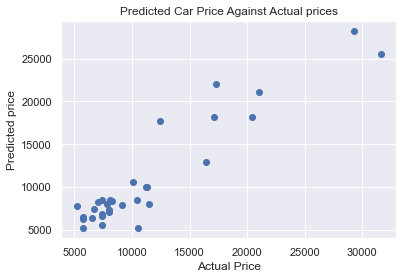

In [56]:
plt.scatter(y_pred, y_test.values)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")

plt.title("Predicted Car Price Against Actual prices")
plt.show()

In [57]:
# Save the model
#torch.save(model, 'car_prices')

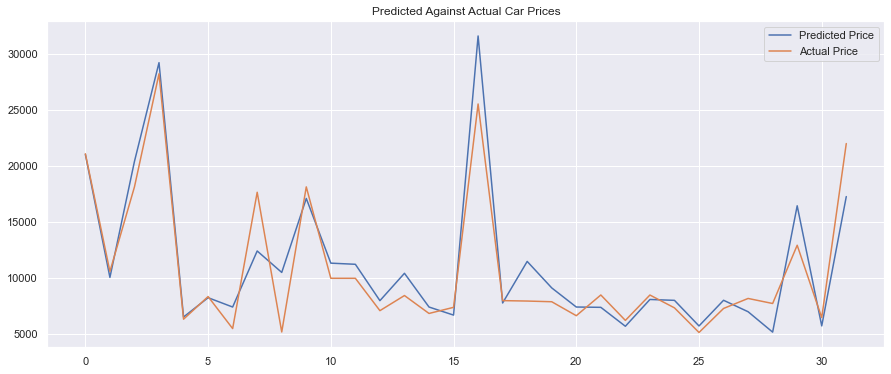

In [59]:
plt.figure(figsize=(15,6))
plt.plot(y_pred, label='Predicted Price')
plt.plot(y_test.values, label='Actual Price')
plt.title("Predicted Against Actual Car Prices")
plt.legend()
plt.show()

The model got a lot of the prices close to actual but there are a few instances where the actual price was very different from the predicted. From the earlier visualisations, there were some outliers for each car model where the price varied from the mean price for that model. There are always cars which are special and might be priced higher or lower depending on the particular features of that car so it would be expected that there might be some differences. Also the dataset is quite small, so a larger number of instances may produce a better model.